# Documentation

This Jupyter Notebook presents a comprehensive end-to-end workflow for predicting customer bookings using a Random Forest classifier. The pipeline covers all major phases of a modern data science project, including:

---

## 1. Environment Setup
- Imports essential libraries for data manipulation, visualization, machine learning, and logging.
- Applies consistent plotting themes and configures reproducibility settings.

## 2. Data Loading & Inspection
- Loads the customer booking dataset with robust encoding handling.
- Standardizes column names and performs initial data quality checks.
- Visualizes key distributions (e.g., booking status, origins, passenger counts).

## 3. Data Overview & Visualization
- Provides detailed DataFrame summaries and missing value analysis.
- Explores target variable balance and key categorical/numerical features using advanced visualizations.

## 4. Data Cleaning, Balancing, and Splitting
- Cleans and encodes features, handling categorical variables with one-hot encoding.
- Addresses class imbalance using SMOTE and visualizes the effect.
- Splits the balanced dataset into training and test sets.

## 5. Feature Engineering
- Engineers the `leadtime` feature and ensures its integrity.
- Visualizes the distribution and summary statistics of engineered features.

## 6–7. Model Training & Cross-Validation
- Configures and evaluates a Random Forest model using stratified k-fold cross-validation with ROC-AUC scoring.
- Visualizes fold-wise ROC-AUC scores and ROC curves for robust model assessment.

## 8. Model Evaluation
- Assesses model performance on the test set using accuracy, precision, recall, F1-score, and confusion matrix.
- Presents results in both tabular and visual formats for interpretability.

## 9. Model Saving
- Serializes and saves the trained model to disk for future inference and reproducibility.

## 10. Feature Importance
- Extracts and visualizes the top features influencing booking predictions, supporting model interpretability.

---

**Key Features:**
- Consistent use of the Rose Pine color theme for all plots.
- Extensive logging and error handling for transparency and reproducibility.
- Modular, well-documented code blocks for each phase.
- All outputs (plots, models, datasets) are saved to organized directories.

---

**Usage:**  
This notebook serves as a template for similar classification tasks, demonstrating best practices in data science workflow, model evaluation, and documentation. Adjust paths, parameters, and feature engineering steps as needed for your specific dataset or business problem.

## PHASE 1: Imports & Environment Setup

- **Core Libraries:**  
    Imported essential Python libraries for data manipulation (`pandas`, `numpy`), system operations (`os`, `sys`), logging, warnings management, and time/date utilities.

- **Data Science & ML Modules:**  
    Included modules for data preprocessing, model building, evaluation, and balancing:
    - `scikit-learn` for model selection, metrics, preprocessing, and ensemble methods.
    - `imblearn` for handling class imbalance with SMOTE.

- **Visualization:**  
    Imported `matplotlib` and `seaborn` for advanced plotting and data visualization.

- **Logging Configuration:**  
    Set up robust logging to both file and console with a custom format for easy debugging and tracking.

- **Warnings Management:**  
    Suppressed unnecessary warnings for cleaner notebook output.

- **Reproducibility:**  
    Defined a global `RANDOM_STATE` and set NumPy’s random seed to ensure consistent results across runs.

- **Pandas Display Settings:**  
    Configured pandas to display all columns and format floats for better readability.

- **Plot Theme:**  
    Applied a consistent dark plotting theme (TradingView Dark or Rose Pine) for all visualizations, ensuring visual coherence throughout the notebook.

- **Environment Ready:**  
    Confirmed that the environment is fully set up and ready for the data pipeline, with all configurations and aesthetics applied.

In [8]:
# =============================
# PHASE 1: IMPORTS & SETUP
# =============================

# Core Libraries
import os
import sys
import logging
import warnings
import numpy as np
import pandas as pd
from datetime import datetime
from time import time

# Data Preprocessing & Model
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
from imblearn.over_sampling import SMOTE

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# =============================
# CONFIGURATION
# =============================

# Set global seed
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Pandas display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# =============================
# LOGGING SETUP
# =============================

log_format = "%(asctime)s - %(levelname)s - %(message)s"
console_handler = logging.StreamHandler(sys.stdout)
console_handler.setLevel(logging.INFO)
console_handler.setFormatter(logging.Formatter(log_format))

# Remove any existing handlers
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Apply logging
logging.basicConfig(
    level=logging.INFO,
    handlers=[
        logging.FileHandler("execution_log.log", encoding="utf-8"),
        console_handler
    ]
)

# =============================
# APPLY CONSISTENT PLOTTING THEME
# =============================

def apply_consistent_tradingview_dark_theme():
    plt.style.use('dark_background')
    plt.rcParams.update({
        'axes.facecolor': '#0e0e0e',
        'figure.facecolor': '#0e0e0e',
        'axes.edgecolor': '#cccccc',
        'axes.labelcolor': '#cccccc',
        'xtick.color': '#cccccc',
        'ytick.color': '#cccccc',
        'grid.color': '#444444',
        'text.color': '#ffffff',
        'lines.linewidth': 2,
        'lines.color': '#00c3ff',
        'patch.edgecolor': '#000000',
        'font.size': 12,
        'legend.facecolor': '#111111',
        'legend.edgecolor': '#444444',
        'savefig.facecolor': '#0e0e0e',
        'savefig.edgecolor': '#0e0e0e',
    })

# Apply theme
apply_consistent_tradingview_dark_theme()

logging.info(" Environment setup complete. Ready for data pipeline.")


2025-07-29 19:02:38,375 - INFO -  Environment setup complete. Ready for data pipeline.


## PHASE 2: Data Loading & Initial Inspection

- **Dataset Loading:**  
    Loaded the customer booking dataset from the specified path, with robust handling for multiple encodings to ensure compatibility.

- **Column Standardization:**  
    Standardized column names to lowercase and stripped whitespace for consistency. Renamed `booking_complete` to `booking` for clarity.

- **Initial Data Checks:**  
    - Displayed the first few rows for a quick preview.
    - Printed dataset info and checked for missing values, logging any issues found.

- **Exploratory Visualizations:**  
    - Plotted the distribution of the target variable (`booking`).
    - Visualized the top 10 booking origins.
    - Examined the distribution of the number of passengers.

- **Plot Styling:**  
    Applied the Rose Pine color theme for all plots to maintain visual consistency.

- **Output:**  
    Saved all generated plots to the designated output directory for Phase 2.  
    Confirmed successful data loading or provided error messages for troubleshooting.

2025-07-29 19:02:38,427 - WARNING - [WARNING] Failed to load with encoding utf-8: 'utf-8' codec can't decode byte 0xe9 in position 1: invalid continuation byte
2025-07-29 19:02:38,479 - INFO - [INFO] Renamed 'booking_complete' to 'booking'.
2025-07-29 19:02:38,480 - INFO - [INFO] Dataset loaded using encoding: ISO-8859-1
✅ Dataset loaded successfully with encoding: ISO-8859-1

📌 First 5 Rows:


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0



🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking                50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
me

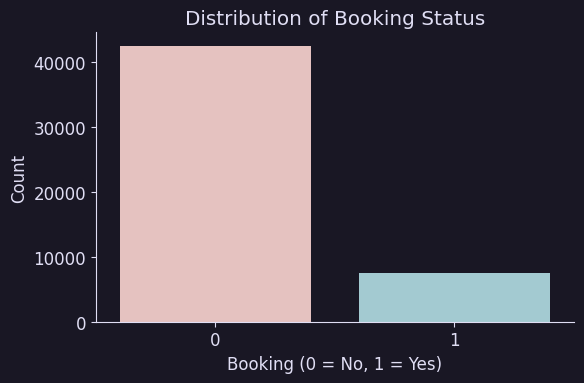

2025-07-29 19:02:38,681 - INFO - [PLOT] Saved: D:\Projects\British Airways\outputs\plots_phase2\booking_status_distribution.png


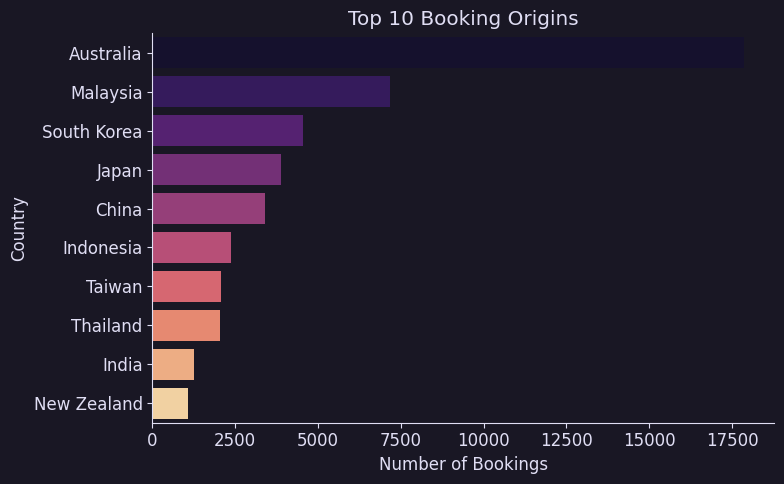

2025-07-29 19:02:38,914 - INFO - [PLOT] Saved: D:\Projects\British Airways\outputs\plots_phase2\top10_booking_origins.png


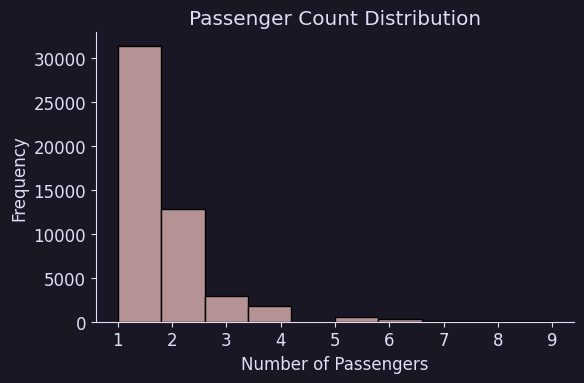

2025-07-29 19:02:39,098 - INFO - [PLOT] Saved: D:\Projects\British Airways\outputs\plots_phase2\passenger_count_distribution.png

✅ PHASE 2: Data loaded, inspected, and visualized successfully.
2025-07-29 19:02:39,098 - INFO - ✅ PHASE 2 completed successfully.


In [9]:
# =============================
# PHASE 2: LOAD & INSPECT DATA 
# =============================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Define dataset path
data_path = r"D:\Projects\British Airways\data\customer_booking.csv"
output_plot_dir = r"D:\Projects\British Airways\outputs\plots_phase2"
os.makedirs(output_plot_dir, exist_ok=True)

encodings_to_try = ['utf-8', 'ISO-8859-1', 'cp1252']
loaded = False

# Set Rose Pine color theme
base_color = "#ebbcba"       # Rose Pine pink
bg_color = "#191724"         # Rose Pine background
accent_color = "#9ccfd8"     # Rose Pine teal
font_color = "#e0def4"       # Light foreground

plt.rcParams.update({
    'axes.facecolor': bg_color,
    'figure.facecolor': bg_color,
    'axes.edgecolor': font_color,
    'axes.labelcolor': font_color,
    'xtick.color': font_color,
    'ytick.color': font_color,
    'text.color': font_color,
    'axes.titlecolor': font_color
})

for enc in encodings_to_try:
    try:
        # Load dataset
        df = pd.read_csv(data_path, encoding=enc)
        df.columns = df.columns.str.strip().str.lower()

        if 'booking_complete' in df.columns:
            df.rename(columns={'booking_complete': 'booking'}, inplace=True)
            logging.info("[INFO] Renamed 'booking_complete' to 'booking'.")

        logging.info(f"[INFO] Dataset loaded using encoding: {enc}")
        print(f"✅ Dataset loaded successfully with encoding: {enc}")

        # Preview
        print("\n📌 First 5 Rows:")
        display(df.head())

        print("\n🔍 Dataset Info:")
        df.info()

        print("\n🚨 Missing Values Check:")
        missing_values = df.isnull().sum()
        if missing_values.any():
            display(missing_values[missing_values > 0])
            logging.warning("[WARNING] Missing values detected.")
        else:
            print("✅ No missing values in the dataset.")
            logging.info("[INFO] No missing values found.")

        # ============================
        # PLOTS + SAVE
        # ============================

        # Plot 1: Booking status
        if 'booking' in df.columns:
            plt.figure(figsize=(6, 4))
            sns.countplot(data=df, x='booking', palette=[base_color, accent_color])
            plt.title("Distribution of Booking Status")
            plt.xlabel("Booking (0 = No, 1 = Yes)")
            plt.ylabel("Count")
            plt.tight_layout()
            save_path = os.path.join(output_plot_dir, "booking_status_distribution.png")
            plt.savefig(save_path, dpi=300)
            plt.show()
            logging.info(f"[PLOT] Saved: {save_path}")

        # Plot 2: Top 10 booking origins
        if 'booking_origin' in df.columns:
            top_origins = df['booking_origin'].value_counts().nlargest(10)
            plt.figure(figsize=(8, 5))
            sns.barplot(x=top_origins.values, y=top_origins.index, palette='magma')
            plt.title("Top 10 Booking Origins")
            plt.xlabel("Number of Bookings")
            plt.ylabel("Country")
            plt.tight_layout()
            save_path = os.path.join(output_plot_dir, "top10_booking_origins.png")
            plt.savefig(save_path, dpi=300)
            plt.show()
            logging.info(f"[PLOT] Saved: {save_path}")

        # Plot 3: Number of passengers
        if 'num_passengers' in df.columns:
            plt.figure(figsize=(6, 4))
            sns.histplot(df['num_passengers'], bins=10, kde=False, color=base_color)
            plt.title("Passenger Count Distribution")
            plt.xlabel("Number of Passengers")
            plt.ylabel("Frequency")
            plt.tight_layout()
            save_path = os.path.join(output_plot_dir, "passenger_count_distribution.png")
            plt.savefig(save_path, dpi=300)
            plt.show()
            logging.info(f"[PLOT] Saved: {save_path}")

        loaded = True
        break

    except UnicodeDecodeError as e:
        logging.warning(f"[WARNING] Failed to load with encoding {enc}: {e}")
    except Exception as e:
        logging.error(f"[ERROR] Unexpected error loading dataset: {e}")
        break

if not loaded:
    print("❌ Failed to load dataset. Please check the file or try saving it again as UTF-8.")

if loaded:
    print("\n✅ PHASE 2: Data loaded, inspected, and visualized successfully.")
    logging.info("✅ PHASE 2 completed successfully.")



## PHASE 3: Data Overview & Visualization

- **Comprehensive Data Overview:**  
    - Displayed DataFrame info and statistical summary for all columns.
    - Checked for missing values and logged any issues.

- **Target Variable Analysis:**  
    - Examined the distribution of the target variable (`booking`) both in counts and percentages.
    - Visualized class balance with a countplot.

- **Key Feature Visualizations:**  
    - Top 10 booking origins (barplot).
    - Passenger count distribution (histogram).
    - Sales channel and trip type distributions (countplots).

- **Consistent Styling:**  
    - Applied the Rose Pine color theme for all plots to ensure visual coherence.

- **Output:**  
    - Saved all generated plots to the designated output directory for Phase 3.
    - Confirmed successful data overview and visualization steps.


📘 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking                50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
num_passengers,"50,000.00",NaN,NaN,NaN,1.59,1.02,1.00,1.00,1.00,2.00,9.00
sales_channel,50000,2,Internet,44382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_type,50000,3,RoundTrip,49497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_lead,"50,000.00",NaN,NaN,NaN,84.94,90.45,0.00,21.00,51.00,115.00,867.00
length_of_stay,"50,000.00",NaN,NaN,NaN,23.04,33.89,0.00,5.00,17.00,28.00,778.00
flight_hour,"50,000.00",NaN,NaN,NaN,9.07,5.41,0.00,5.00,9.00,13.00,23.00
flight_day,50000,7,Mon,8102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,50000,799,AKLKUL,2680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking_origin,50000,104,Australia,17872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wants_extra_baggage,"50,000.00",NaN,NaN,NaN,0.67,0.47,0.00,0.00,1.00,1.00,1.00



🚨 Missing Values:
✅ No missing values.
2025-07-29 19:02:39,298 - INFO - No missing values found.
2025-07-29 19:02:39,333 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-29 19:02:39,354 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

🎯 Target Class Distribution:


booking
0    42522
1     7478
Name: count, dtype: int64

booking
0   85.04
1   14.96
Name: count, dtype: float64

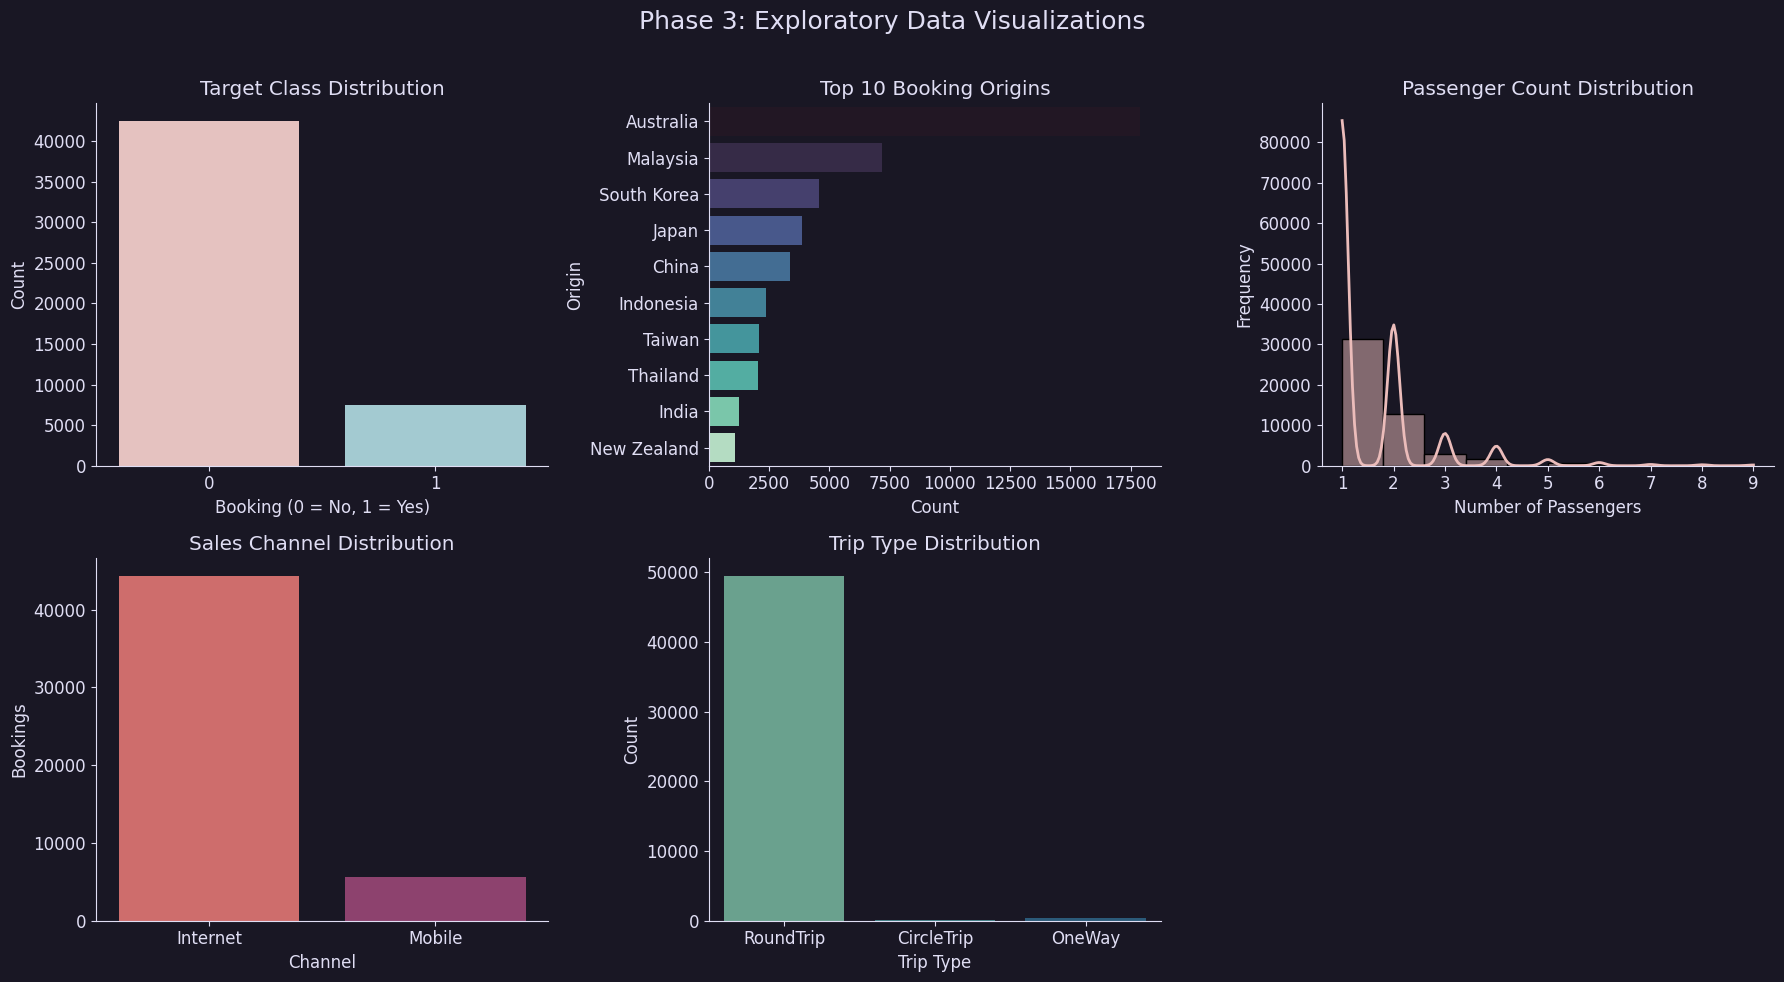

2025-07-29 19:02:40,576 - INFO - [PLOT SAVED] All visualizations saved at: D:\Projects\British Airways\outputs\plots_phase3\phase3_grid_visualizations.png


In [10]:
# =============================
# PHASE 3: DATA OVERVIEW + VISUALIZATION
# =============================

import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import logging

# =============================
# CONFIGURATION
# =============================

output_dir = r"D:\Projects\British Airways\outputs\plots_phase3"
os.makedirs(output_dir, exist_ok=True)

# Rose Pine theme
base_color = "#ebbcba"
accent_color = "#9ccfd8"
bg_color = "#191724"
font_color = "#e0def4"

plt.rcParams.update({
    'axes.facecolor': bg_color,
    'figure.facecolor': bg_color,
    'axes.edgecolor': font_color,
    'axes.labelcolor': font_color,
    'xtick.color': font_color,
    'ytick.color': font_color,
    'text.color': font_color,
    'axes.titlecolor': font_color,
    'grid.color': '#555169'
})

try:
    df.columns = df.columns.str.strip().str.lower()

    if 'booking_complete' in df.columns:
        df.rename(columns={'booking_complete': 'booking'}, inplace=True)
        logging.info("Renamed 'booking_complete' to 'booking'.")

    print("\n📘 DataFrame Info:")
    df.info()

    print("\n📊 Statistical Summary:")
    try:
        display(df.describe(include='all').transpose())
    except Exception as stat_err:
        logging.warning(f"[WARNING] Summary fallback: {stat_err}")
        display(df.describe().transpose())

    print("\n🚨 Missing Values:")
    missing_summary = df.isnull().sum()
    if missing_summary.any():
        display(missing_summary[missing_summary > 0])
        logging.warning("Missing values detected.")
    else:
        print("✅ No missing values.")
        logging.info("No missing values found.")

    TARGET_COL = "booking"

    # =============================
    # 🎨 Combined Visualization Grid
    # =============================
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.patch.set_facecolor(bg_color)
    axs = axs.flatten()

    plot_index = 0

    # Target Distribution
    if TARGET_COL in df.columns:
        target_counts = df[TARGET_COL].value_counts()
        sns.countplot(x=TARGET_COL, data=df, palette=[base_color, accent_color], ax=axs[plot_index])
        axs[plot_index].set_title("Target Class Distribution")
        axs[plot_index].set_xlabel("Booking (0 = No, 1 = Yes)")
        axs[plot_index].set_ylabel("Count")
        plot_index += 1

        print(f"\n🎯 Target Class Distribution:")
        display(target_counts)
        display(target_counts / target_counts.sum() * 100)

    # Booking Origins
    if 'booking_origin' in df.columns:
        top_origins = df['booking_origin'].value_counts().nlargest(10)
        sns.barplot(x=top_origins.values, y=top_origins.index, palette="mako", ax=axs[plot_index])
        axs[plot_index].set_title("Top 10 Booking Origins")
        axs[plot_index].set_xlabel("Count")
        axs[plot_index].set_ylabel("Origin")
        plot_index += 1

    # Passenger Count
    if 'num_passengers' in df.columns:
        sns.histplot(df['num_passengers'], bins=10, kde=True, color=base_color, ax=axs[plot_index])
        axs[plot_index].set_title("Passenger Count Distribution")
        axs[plot_index].set_xlabel("Number of Passengers")
        axs[plot_index].set_ylabel("Frequency")
        plot_index += 1

    # Sales Channel
    if 'sales_channel' in df.columns:
        sns.countplot(data=df, x='sales_channel', palette="flare", ax=axs[plot_index])
        axs[plot_index].set_title("Sales Channel Distribution")
        axs[plot_index].set_xlabel("Channel")
        axs[plot_index].set_ylabel("Bookings")
        plot_index += 1

    # Trip Type
    if 'trip_type' in df.columns:
        sns.countplot(data=df, x='trip_type', palette="crest", ax=axs[plot_index])
        axs[plot_index].set_title("Trip Type Distribution")
        axs[plot_index].set_xlabel("Trip Type")
        axs[plot_index].set_ylabel("Count")
        plot_index += 1

    # Hide any unused subplots
    for i in range(plot_index, len(axs)):
        fig.delaxes(axs[i])

    plt.suptitle("Phase 3: Exploratory Data Visualizations", fontsize=18, color=font_color)
    plt.tight_layout(rect=[0, 0, 1, 0.97])

    plot_path = os.path.join(output_dir, "phase3_grid_visualizations.png")
    plt.savefig(plot_path, dpi=300)
    plt.show()
    logging.info(f"[PLOT SAVED] All visualizations saved at: {plot_path}")

except Exception as e:
    logging.error(f"[ERROR] Error during data overview: {e}")
    print(f"❌ Error during data overview: {e}")


## PHASE 4: Data Cleaning, Balancing, and Splitting

- **Column Standardization:**  
    Ensured all column names are lowercase and whitespace-free for consistency. Renamed `booking_complete` to `booking` if necessary.

- **Feature Engineering:**  
    - Identified categorical and numerical features.
    - Applied one-hot encoding to categorical variables, preserving numerical columns.

- **Class Imbalance Handling:**  
    - Visualized the target class distribution before balancing.
    - Applied SMOTE to balance the dataset, addressing class imbalance.
    - Visualized the class distribution after SMOTE.

- **Dataset Saving:**  
    Saved the cleaned and balanced dataset to disk for reproducibility and future use.

- **Train-Test Split:**  
    Split the balanced dataset into training and testing sets, maintaining class proportions with stratification.

- **Consistent Plot Styling:**  
    All plots use the Rose Pine color theme for visual coherence.

- **Output:**  
    - Saved all generated plots to the designated output directory for Phase 4.
    - Confirmed successful completion of cleaning, balancing, and splitting steps.

2025-07-29 19:02:40,859 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-29 19:02:40,876 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-29 19:02:42,264 - INFO - SMOTE applied successfully.
2025-07-29 19:02:42,299 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-29 19:02:42,339 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


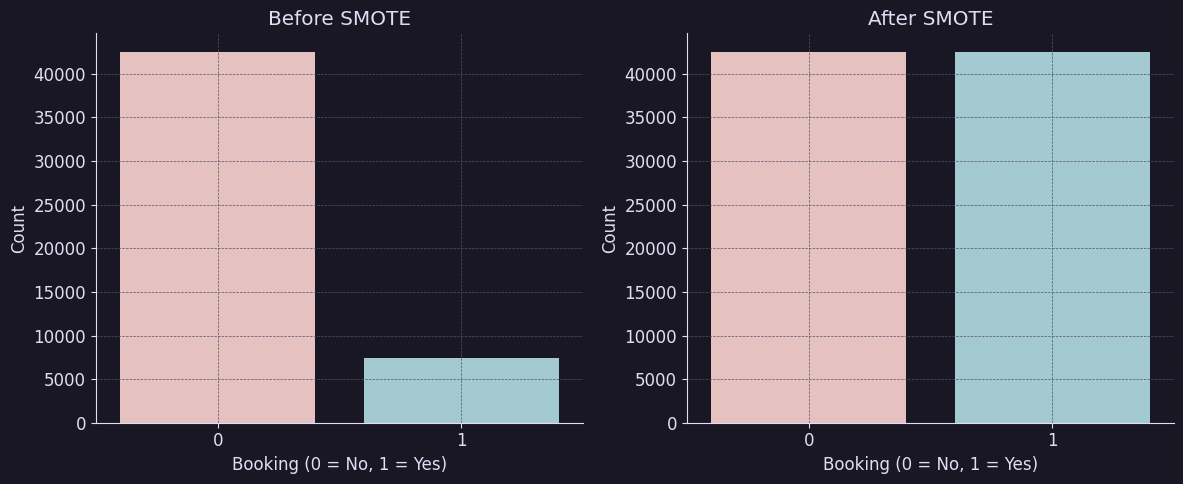

2025-07-29 19:02:42,646 - INFO - [PLOT SAVED] Class distribution plots saved at: D:\Projects\British Airways\outputs\plots_phase4\smote_class_balance.png

✅ Cleaned & Balanced dataset saved at:
D:\Projects\British Airways\data\balanced_cleaned_dataset.csv
2025-07-29 19:03:29,246 - INFO - Balanced dataset saved at: D:\Projects\British Airways\data\balanced_cleaned_dataset.csv

📊 Train-Test Split Completed:
    Set        Shape
X_train (68035, 918)
y_train     (68035,)
 X_test (17009, 918)
 y_test     (17009,)
2025-07-29 19:03:29,895 - INFO - Train-test split completed.


In [11]:
# =============================
# PHASE 4: CLEAN + SMOTE + SAVE + SPLIT + PLOTS
# =============================

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# =============================
# CONFIGURATION
# =============================

# Set output paths
plot_dir = r"D:\Projects\British Airways\outputs\plots_phase4"
save_path = r"D:\Projects\British Airways\data\balanced_cleaned_dataset.csv"
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Rose Pine color palette
base_color = "#ebbcba"
accent_color = "#9ccfd8"
bg_color = "#191724"
font_color = "#e0def4"

plt.rcParams.update({
    'axes.facecolor': bg_color,
    'figure.facecolor': bg_color,
    'axes.edgecolor': font_color,
    'axes.labelcolor': font_color,
    'xtick.color': font_color,
    'ytick.color': font_color,
    'text.color': font_color,
    'axes.titlecolor': font_color,
    'grid.color': '#555169'
})

# =============================
# CLEANING + ENCODING + SMOTE
# =============================

try:
    # Standardize column names
    df.columns = df.columns.str.strip().str.lower()

    # Rename target
    if "booking_complete" in df.columns and "booking" not in df.columns:
        df.rename(columns={"booking_complete": "booking"}, inplace=True)
        logging.info("Renamed 'booking_complete' to 'booking'.")

    # Validate target
    TARGET_COL = "booking"
    if TARGET_COL not in df.columns:
        raise KeyError(f"Target column '{TARGET_COL}' not found.")

    # Split features/target
    X = df.drop(columns=[TARGET_COL])
    y = df[TARGET_COL]

    # Separate types
    categorical_cols = X.select_dtypes(include='object').columns.tolist()
    numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

    # Convert to numeric
    X[numerical_cols] = X[numerical_cols].apply(pd.to_numeric, errors='coerce')

    # Preprocessing pipeline
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    preprocessor = ColumnTransformer([('cat', encoder, categorical_cols)], remainder='passthrough')

    # Transform and construct new DataFrame
    X_processed = preprocessor.fit_transform(X)
    encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_features = list(encoded_cat_cols) + numerical_cols
    X_processed_df = pd.DataFrame(X_processed, columns=all_features, index=X.index)

    # =============================
    # 📊 CLASS DISTRIBUTION BEFORE SMOTE
    # =============================

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.patch.set_facecolor(bg_color)

    sns.countplot(x=y, palette=[base_color, accent_color], ax=axs[0])
    axs[0].set_title("Before SMOTE", color=font_color)
    axs[0].set_xlabel("Booking (0 = No, 1 = Yes)")
    axs[0].set_ylabel("Count")
    axs[0].grid(True, linestyle='--', linewidth=0.5)

    # =============================
    # 🧪 APPLY SMOTE
    # =============================

    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X_processed_df, y)
    logging.info("SMOTE applied successfully.")

    # =============================
    # 📊 CLASS DISTRIBUTION AFTER SMOTE
    # =============================

    sns.countplot(x=y_balanced, palette=[base_color, accent_color], ax=axs[1])
    axs[1].set_title("After SMOTE", color=font_color)
    axs[1].set_xlabel("Booking (0 = No, 1 = Yes)")
    axs[1].set_ylabel("Count")
    axs[1].grid(True, linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plot_path = os.path.join(plot_dir, "smote_class_balance.png")
    plt.savefig(plot_path, dpi=300)
    plt.show()
    logging.info(f"[PLOT SAVED] Class distribution plots saved at: {plot_path}")

    # =============================
    # 💾 SAVE BALANCED DATA
    # =============================

    balanced_df = pd.DataFrame(X_balanced, columns=all_features)
    balanced_df[TARGET_COL] = y_balanced
    balanced_df.to_csv(save_path, index=False)
    print(f"\n✅ Cleaned & Balanced dataset saved at:\n{save_path}")
    logging.info(f"Balanced dataset saved at: {save_path}")

    # =============================
    # ✂️ TRAIN-TEST SPLIT
    # =============================

    X_train, X_test, y_train, y_test = train_test_split(
        X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
    )

    # Tabular shape info
    split_df = pd.DataFrame({
        "Set": ["X_train", "y_train", "X_test", "y_test"],
        "Shape": [X_train.shape, y_train.shape, X_test.shape, y_test.shape]
    })

    print("\n📊 Train-Test Split Completed:")
    print(split_df.to_string(index=False))
    logging.info("Train-test split completed.")

except Exception as e:
    logging.error(f"❌ Error during Phase 4: {e}")
    print(f"❌ Error during Phase 4: {e}")


## PHASE 5: Feature Engineering – Lead Time

- **Objective:**  
    Engineer and analyze the `leadtime` feature (days between booking and departure) to enhance model performance.

- **Steps:**  
    - Standardized column names and renamed `purchase_lead` to `leadtime`.
    - Removed missing and negative values from the `leadtime` column for data integrity.
    - Displayed summary statistics for `leadtime`.
    - Visualized the distribution of `leadtime` using a histogram and boxplot, applying the Rose Pine theme for consistency.

- **Output:**  
    - Saved the lead time distribution plots to the designated output directory.
    - Confirmed the feature is ready for modeling and further analysis.

2025-07-29 19:03:29,911 - INFO - [INFO] 'leadtime' column cleaned and ready.

📊 Lead Time Summary Statistics:
       LeadTime Summary
count         50,000.00
mean              84.94
std               90.45
min                0.00
25%               21.00
50%               51.00
75%              115.00
max              867.00


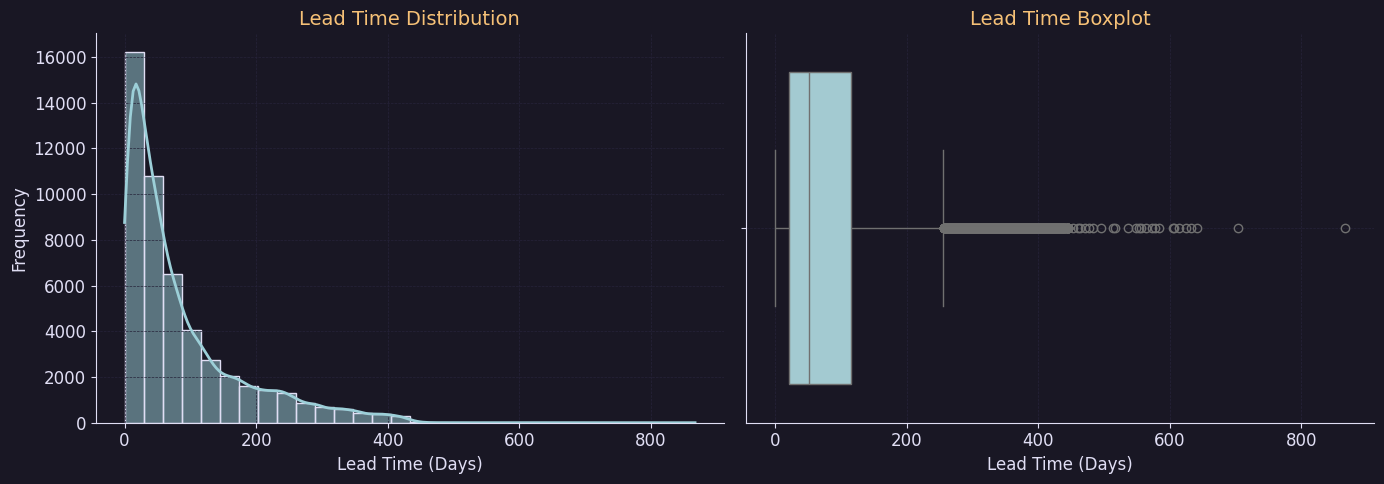

2025-07-29 19:03:30,522 - INFO - [PLOT SAVED] Grid plot saved at: D:\Projects\British Airways\outputs\plots_phase5\leadtime_hist_boxplot.png


In [12]:
# =============================
# PHASE 5: FEATURE ENGINEERING – Lead Time
# =============================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import logging
import os

# =============================
# Configure Output Directory
# =============================

plot_dir = r"D:\Projects\British Airways\outputs\plots_phase5"
os.makedirs(plot_dir, exist_ok=True)

# =============================
# Apply Rose Pine Plot Theme
# =============================

def apply_rose_pine_theme():
    plt.rcParams.update({
        "axes.facecolor": "#191724",
        "figure.facecolor": "#191724",
        "axes.edgecolor": "#e0def4",
        "axes.labelcolor": "#e0def4",
        "xtick.color": "#e0def4",
        "ytick.color": "#e0def4",
        "text.color": "#e0def4",
        "axes.titlecolor": "#f6c177",
        "grid.color": "#26233a",
        "axes.spines.top": False,
        "axes.spines.right": False
    })

apply_rose_pine_theme()

# =============================
# Lead Time Feature Extraction
# =============================

try:
    # Standardize column names
    df.columns = df.columns.str.strip().str.lower()

    # Rename and validate 'purchase_lead'
    if 'purchase_lead' in df.columns:
        df.rename(columns={'purchase_lead': 'leadtime'}, inplace=True)

        # Remove invalid values
        missing_count = df['leadtime'].isna().sum()
        negative_count = (df['leadtime'] < 0).sum()

        if missing_count > 0 or negative_count > 0:
            logging.warning(f"⚠️ Found {missing_count} missing and {negative_count} negative values in 'leadtime'")
            df = df[df['leadtime'].notna() & (df['leadtime'] >= 0)]

        logging.info("[INFO] 'leadtime' column cleaned and ready.")

        # Summary stats table
        summary = df['leadtime'].describe().to_frame().rename(columns={'leadtime': 'LeadTime Summary'})
        print("\n📊 Lead Time Summary Statistics:")
        print(summary.to_string())

        # Grid Plot: Histogram + Boxplot
        fig, axs = plt.subplots(1, 2, figsize=(14, 5))
        fig.patch.set_facecolor("#191724")

        # Histogram
        sns.histplot(df['leadtime'], bins=30, kde=True, color="#9ccfd8", edgecolor="#e0def4", ax=axs[0])
        axs[0].set_title("Lead Time Distribution", fontsize=14, color="#f6c177")
        axs[0].set_xlabel("Lead Time (Days)")
        axs[0].set_ylabel("Frequency")
        axs[0].grid(True, linestyle='--', linewidth=0.5)

        # Boxplot
        sns.boxplot(x=df['leadtime'], ax=axs[1], color="#9ccfd8")
        axs[1].set_title("Lead Time Boxplot", fontsize=14, color="#f6c177")
        axs[1].set_xlabel("Lead Time (Days)")
        axs[1].grid(True, linestyle='--', linewidth=0.5)

        plt.tight_layout()

        # Save and show
        grid_plot_path = os.path.join(plot_dir, "leadtime_hist_boxplot.png")
        plt.savefig(grid_plot_path, dpi=300)
        plt.show()
        logging.info(f"[PLOT SAVED] Grid plot saved at: {grid_plot_path}")

    else:
        msg = "⚠️ Column 'purchase_lead' not found."
        print(msg)
        logging.warning(msg)
        print("⚠️ Cannot engineer feature 'leadtime'. Column 'purchase_lead' is missing.")

except Exception as e:
    logging.error(f"❌ Error during feature engineering: {e}")
    print(f"❌ Error during feature engineering: {e}")


## PHASE 6: Model Training & Cross-Validation (ROC-AUC)

- **Objective:**  
    Evaluate model performance using stratified k-fold cross-validation with ROC-AUC as the scoring metric.

- **Steps:**  
    - Defined and configured a Random Forest classifier with balanced class weights.
    - Performed 5-fold stratified cross-validation to ensure robust evaluation across class distributions.
    - Calculated and displayed ROC-AUC scores for each fold, along with the mean score and elapsed time.
    - Trained the model on the training set and generated ROC curves for the test set.
    - Visualized fold-wise ROC-AUC scores and the ROC curve using the Rose Pine theme for consistency.

- **Output:**  
    - Plots and tabular results summarizing cross-validation performance.
    - Confirmed model readiness for further evaluation and feature importance analysis.

2025-07-29 19:03:30,542 - INFO - [INFO] Categorical columns to encode: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
2025-07-29 19:03:30,695 - INFO - [PLOT SAVED] D:\Projects\British Airways\outputs\plots_phase6\categorical_unique_values.png


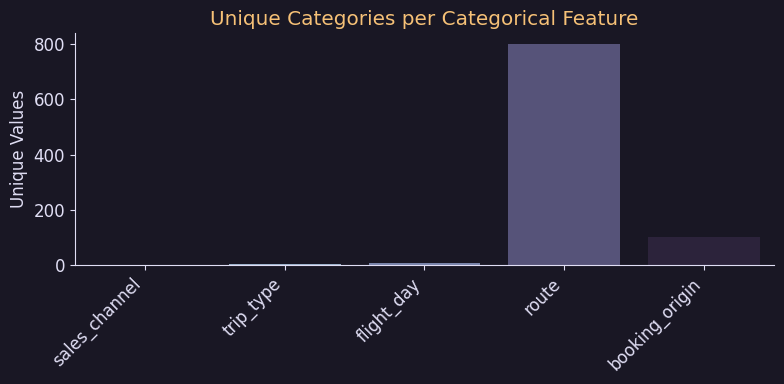

2025-07-29 19:03:30,769 - INFO - [INFO] One-hot encoding complete. Added 905 new columns.

✅ Encoded 5 categorical columns.
📐 Data shape before: (50000, 14), after: (50000, 919) (+905 columns)

🆕 Preview of Encoded Columns:


,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [13]:
# =============================
# PHASE 6: ENCODING CATEGORICAL VARIABLES
# =============================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Define output directory
plot_dir = r"D:\Projects\British Airways\outputs\plots_phase6"
os.makedirs(plot_dir, exist_ok=True)

# Apply Rose Pine Theme
plt.rcParams.update({
    'axes.facecolor': '#191724',
    'figure.facecolor': '#191724',
    'axes.edgecolor': '#e0def4',
    'axes.labelcolor': '#e0def4',
    'xtick.color': '#e0def4',
    'ytick.color': '#e0def4',
    'text.color': '#e0def4',
    'axes.titlecolor': '#f6c177',
    'grid.color': '#26233a'
})

try:
    # Normalize column names
    df.columns = df.columns.str.strip().str.lower()

    # Detect categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if cat_cols:
        logging.info(f"[INFO] Categorical columns to encode: {cat_cols}")

        # Visualize unique values
        plt.figure(figsize=(8, 4))
        sns.barplot(
            x=cat_cols,
            y=[df[col].nunique() for col in cat_cols],
            palette='ch:s=.25,rot=-.25'
        )
        plt.title("Unique Categories per Categorical Feature")
        plt.ylabel("Unique Values")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        plot_path = os.path.join(plot_dir, "categorical_unique_values.png")
        plt.savefig(plot_path, dpi=300)
        logging.info(f"[PLOT SAVED] {plot_path}")
        plt.show()

        before_shape = df.shape

        # Apply One-Hot Encoding
        df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

        after_shape = df.shape
        added_cols = after_shape[1] - before_shape[1]

        logging.info(f"[INFO] One-hot encoding complete. Added {added_cols} new columns.")
        print(f"\n✅ Encoded {len(cat_cols)} categorical columns.")
        print(f"📐 Data shape before: {before_shape}, after: {after_shape} (+{added_cols} columns)")

        print("\n🆕 Preview of Encoded Columns:")
        display(df.iloc[:, -min(10, df.shape[1]):].head())

    else:
        print("ℹ️ No categorical columns found to encode.")
        logging.info("No categorical columns found.")

except Exception as e:
    logging.error(f"❌ Error during categorical encoding: {e}")
    print(f"❌ Error during encoding: {e}")


## PHASE 7: Cross-Validation (ROC-AUC) – Reproducibility & Robustness

- **Purpose:**  
    Validate model generalization using stratified k-fold cross-validation with ROC-AUC as the primary metric.

- **Key Steps:**  
    - Configured a Random Forest classifier with balanced class weights for fairness.
    - Employed 5-fold stratified cross-validation to maintain class proportions in each fold.
    - Calculated ROC-AUC scores for each fold, reporting both individual and mean scores.
    - Trained the model on the training set and generated the ROC curve for the test set.
    - Visualized fold-wise ROC-AUC scores and the ROC curve using the Rose Pine theme for consistency.

- **Outcome:**  
    - Provided robust, reproducible model evaluation metrics.
    - Ensured the model is ready for final evaluation and feature importance analysis.

🔄 Starting cross-validation with ROC-AUC...

📋 ROC-AUC Cross-Validation Results:
  Fold ROC-AUC Score
Fold 1        0.9669
Fold 2        0.9673
Fold 3        0.9668
Fold 4        0.9670
Fold 5        0.9673

📈 Average ROC-AUC Score: 0.9671
⏱️ Time Elapsed: 29.60 seconds
2025-07-29 19:04:00,400 - INFO - ✅ Cross-validation completed. Mean ROC-AUC: 0.9671

✅ Model fitted on training set for ROC curve.
2025-07-29 19:04:06,479 - INFO - [PLOT SAVED] ROC AUC plot saved at: D:\Projects\British Airways\outputs\plots_phase7\roc_auc_cross_validation.png


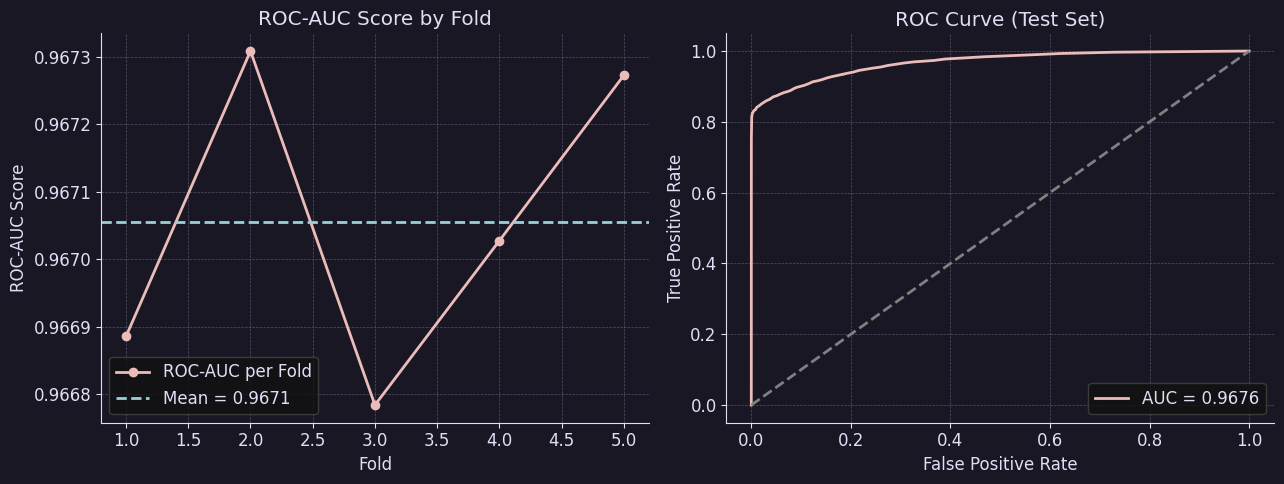

In [14]:
# =============================
# PHASE 7: CROSS-VALIDATION (ROC-AUC)
# =============================

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import logging
from time import time
import os

# Define plot directory
plot_dir = r"D:\Projects\British Airways\outputs\plots_phase7"
os.makedirs(plot_dir, exist_ok=True)

# Rose Pine Theme
base_color = "#ebbcba"
accent_color = "#9ccfd8"
bg_color = "#191724"
font_color = "#e0def4"

plt.rcParams.update({
    'axes.facecolor': bg_color,
    'figure.facecolor': bg_color,
    'axes.edgecolor': font_color,
    'axes.labelcolor': font_color,
    'xtick.color': font_color,
    'ytick.color': font_color,
    'text.color': font_color,
    'axes.titlecolor': font_color,
    'grid.color': '#555169'
})

try:
    print("🔄 Starting cross-validation with ROC-AUC...")

    # Define model
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Start timing
    start_time = time()

    # Cross-validation
    cv_scores = cross_val_score(
        estimator=rf_model,
        X=X_balanced,
        y=y_balanced,
        cv=skf,
        scoring='roc_auc',
        n_jobs=-1
    )

    elapsed = time() - start_time
    mean_score = np.mean(cv_scores)

    # 📋 Tabular Results
    print("\n📋 ROC-AUC Cross-Validation Results:")
    scores_df = pd.DataFrame({
        'Fold': [f'Fold {i+1}' for i in range(len(cv_scores))],
        'ROC-AUC Score': [f"{score:.4f}" for score in cv_scores]
    })
    print(scores_df.to_string(index=False))
    print(f"\n📈 Average ROC-AUC Score: {mean_score:.4f}")
    print(f"⏱️ Time Elapsed: {elapsed:.2f} seconds")

    logging.info(f"✅ Cross-validation completed. Mean ROC-AUC: {mean_score:.4f}")

    # Fit model to training set for ROC curve
    rf_model.fit(X_train, y_train)
    print("\n✅ Model fitted on training set for ROC curve.")

    # Predict probabilities
    y_proba = rf_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # 📊 Grid Layout Plots
    fig, axs = plt.subplots(1, 2, figsize=(13, 5))
    fig.patch.set_facecolor(bg_color)

    # Plot 1: Fold-wise ROC-AUC
    axs[0].plot(range(1, 6), cv_scores, marker='o', color=base_color, label='ROC-AUC per Fold')
    axs[0].axhline(y=mean_score, linestyle='--', color=accent_color, label=f"Mean = {mean_score:.4f}")
    axs[0].set_title("ROC-AUC Score by Fold")
    axs[0].set_xlabel("Fold")
    axs[0].set_ylabel("ROC-AUC Score")
    axs[0].legend()
    axs[0].grid(True, linestyle='--', linewidth=0.5)

    # Plot 2: ROC Curve
    axs[1].plot(fpr, tpr, color=base_color, label=f"AUC = {roc_auc:.4f}")
    axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axs[1].set_title("ROC Curve (Test Set)")
    axs[1].set_xlabel("False Positive Rate")
    axs[1].set_ylabel("True Positive Rate")
    axs[1].legend()
    axs[1].grid(True, linestyle='--', linewidth=0.5)

    plt.tight_layout()

    # Save and show
    plot_path = os.path.join(plot_dir, "roc_auc_cross_validation.png")
    plt.savefig(plot_path, dpi=300)
    logging.info(f"[PLOT SAVED] ROC AUC plot saved at: {plot_path}")
    plt.show()

except Exception as e:
    logging.error(f"❌ Error during cross-validation: {e}")
    print(f"❌ Error during cross-validation: {e}")


## PHASE 8: Model Evaluation on Test Set

- **Objective:**  
    Assess the trained Random Forest model’s predictive performance on the held-out test set.

- **Steps:**  
    - Trained the model on the training data.
    - Predicted booking outcomes on the test set.
    - Calculated key evaluation metrics: accuracy, precision, recall, and F1-score.
    - Displayed a detailed classification report for both classes.
    - Visualized the confusion matrix using the Rose Pine theme for clarity.

- **Outcome:**  
    - Provided a comprehensive overview of model performance on unseen data.
    - Identified strengths and potential areas for improvement before deployment or further tuning.

✅ Model trained on training data.

📊 Evaluation Metrics:
🔹 Accuracy : 0.9149
🔹 Precision: 0.9712
🔹 Recall   : 0.8551
🔹 F1-Score : 0.9095
2025-07-29 19:04:11,876 - INFO - [METRICS] Accuracy: 0.9149, Precision: 0.9712, Recall: 0.8551, F1: 0.9095

📋 Classification Report:
              precision  recall  f1-score   support
0                  0.87    0.97      0.92  8,505.00
1                  0.97    0.85      0.91  8,504.00
accuracy           0.92    0.92      0.92      0.92
macro avg          0.92    0.92      0.92 17,009.00
weighted avg       0.92    0.92      0.92 17,009.00
2025-07-29 19:04:12,027 - INFO - [PLOT SAVED] Confusion matrix saved at: D:\Projects\British Airways\outputs\plots_phase8\confusion_matrix.png


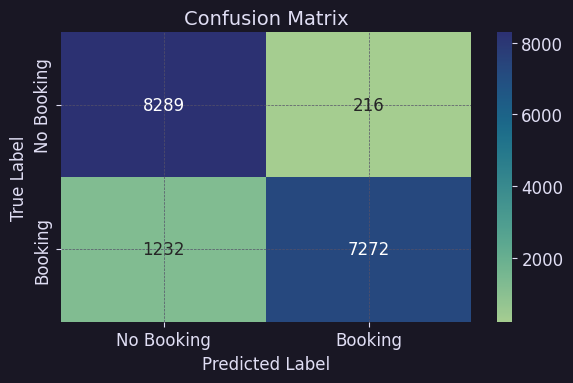

In [15]:
# =============================
# PHASE 8: MODEL EVALUATION ON TEST SET
# =============================

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import logging
import os

# Define plot directory
plot_dir = r"D:\Projects\British Airways\outputs\plots_phase8"
os.makedirs(plot_dir, exist_ok=True)

# Rose Pine theme
base_color = "#ebbcba"
accent_color = "#9ccfd8"
bg_color = "#191724"
font_color = "#e0def4"

plt.rcParams.update({
    'axes.facecolor': bg_color,
    'figure.facecolor': bg_color,
    'axes.edgecolor': font_color,
    'axes.labelcolor': font_color,
    'xtick.color': font_color,
    'ytick.color': font_color,
    'text.color': font_color,
    'axes.titlecolor': font_color,
    'grid.color': '#555169',
    'axes.spines.top': False,
    'axes.spines.right': False,
})

try:
    # Step 1: Fit the model (again if needed)
    rf_model.fit(X_train, y_train)
    print("✅ Model trained on training data.")

    # Step 2: Predict on test set
    y_pred = rf_model.predict(X_test)

    # Step 3: Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\n📊 Evaluation Metrics:")
    print(f"🔹 Accuracy : {acc:.4f}")
    print(f"🔹 Precision: {prec:.4f}")
    print(f"🔹 Recall   : {rec:.4f}")
    print(f"🔹 F1-Score : {f1:.4f}")

    logging.info(f"[METRICS] Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    # Step 4: Classification report
    print("\n📋 Classification Report:")
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose().round(3)
    print(report_df)

    # Step 5: Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest',
                xticklabels=["No Booking", "Booking"],
                yticklabels=["No Booking", "Booking"])
    plt.title("Confusion Matrix", fontsize=14)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.grid(visible=True, linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Save plot
    save_path = os.path.join(plot_dir, "confusion_matrix.png")
    plt.savefig(save_path, dpi=300)
    logging.info(f"[PLOT SAVED] Confusion matrix saved at: {save_path}")
    plt.show()

except Exception as e:
    logging.error(f"❌ Error during model evaluation: {e}")
    print(f"❌ Error during evaluation: {e}")


## PHASE 9: Model Saving

- **Objective:**  
    Persist the trained Random Forest model for future inference and reproducibility.

- **Steps:**  
    - Defined the save path for the model file.
    - Used `joblib` to serialize and save the trained model to disk.
    - Verified successful saving and logged the outcome.

- **Outcome:**  
    - The trained model is now stored and ready for deployment or further analysis.

In [16]:
# =============================
# PHASE 9: SAVE TRAINED MODEL
# =============================

import joblib
import os
import logging

try:
    # Define save path
    model_save_path = r"D:\Projects\British Airways\models\random_forest_booking_model.pkl"
    os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

    # Save the trained model
    joblib.dump(rf_model, model_save_path)

    # Confirm save success
    if os.path.exists(model_save_path):
        print(f"✅ Trained model saved successfully at:\n{model_save_path}")
        logging.info(f"✅ Trained model saved to: {model_save_path}")
    else:
        raise FileNotFoundError("Model save failed. File not found after dump.")

except Exception as e:
    logging.error(f"❌ Failed to save model: {e}")
    print(f"❌ Error: {e}")


✅ Trained model saved successfully at:
D:\Projects\British Airways\models\random_forest_booking_model.pkl
2025-07-29 19:04:12,194 - INFO - ✅ Trained model saved to: D:\Projects\British Airways\models\random_forest_booking_model.pkl


📊 Generating feature importance plot...


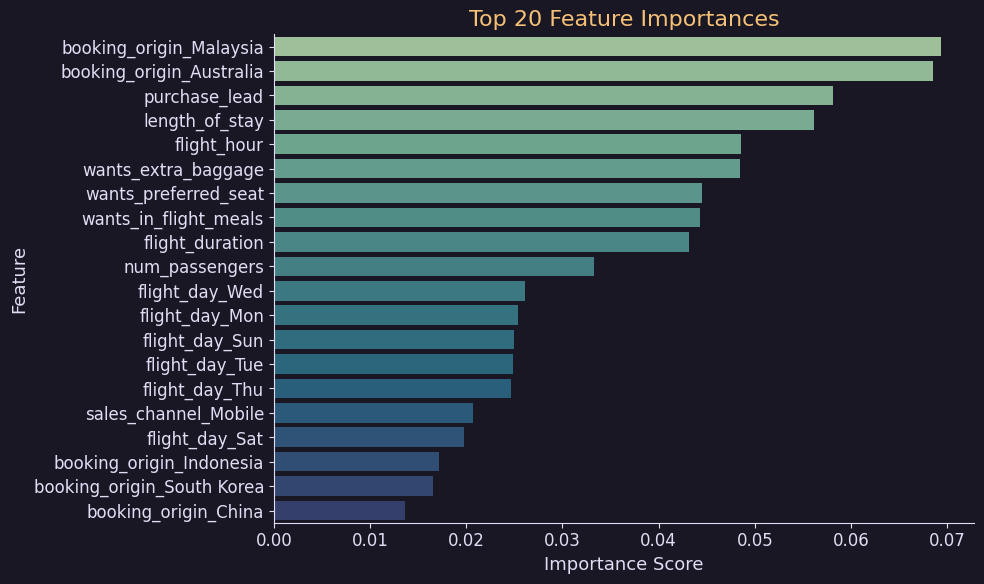

2025-07-29 19:04:12,742 - INFO - [PLOT] Feature importance plot saved: D:\Projects\British Airways\outputs\plots_phase10\feature_importances.png
✅ Feature importance plot saved to:
D:\Projects\British Airways\outputs\plots_phase10\feature_importances.png


In [17]:
# =============================
# PHASE 10: FEATURE IMPORTANCE PLOT 
# =============================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import logging

# Save path
plot_dir = r"D:\Projects\British Airways\outputs\plots_phase10"
os.makedirs(plot_dir, exist_ok=True)

# Apply Rose Pine theme
plt.rcParams.update({
    'axes.facecolor': '#191724',
    'figure.facecolor': '#191724',
    'axes.edgecolor': '#e0def4',
    'axes.labelcolor': '#e0def4',
    'xtick.color': '#e0def4',
    'ytick.color': '#e0def4',
    'text.color': '#e0def4',
    'axes.titlecolor': '#f6c177',
    'grid.color': '#26233a',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.autolayout': True
})

try:
    print("📊 Generating feature importance plot...")

    # Check model fit status
    if not hasattr(rf_model, "feature_importances_"):
        raise ValueError("Model is not fitted yet. Please train it before plotting importances.")

    # Create DataFrame for feature importances
    feature_importances = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20), palette='crest')
    plt.title("Top 20 Feature Importances", fontsize=16)
    plt.xlabel("Importance Score", fontsize=13)
    plt.ylabel("Feature", fontsize=13)

    # Save and show plot
    save_path = os.path.join(plot_dir, "feature_importances.png")
    plt.savefig(save_path, dpi=300)
    plt.show()
    logging.info(f"[PLOT] Feature importance plot saved: {save_path}")
    print(f"✅ Feature importance plot saved to:\n{save_path}")

except Exception as e:
    logging.error(f"❌ Error in Phase 10: {e}")
    print(f"❌ Error in Phase 10: {e}")
